### **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from tqdm import tqdm

### **1. Data Exploration & Preprocessing**

In [ ]:
df = pd.read_csv("/content/jobs.csv")

In [ ]:
df.head()

,job_id,job_role,company,experience,salary,location,rating,reviews,resposibilities,posted_on,job_link,company_link
0,7.012301e+10,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,"Kolkata, Hyderabad/Secunderabad, Pune, Ahmedab...",4.0,39110 Reviews,"Customer Service,Sales,Relationship Management",1 Day Ago,https://www.naukri.com/job-listings-branch-ban...,https://www.naukri.com/hdfc-bank-jobs-careers-213
1,6.012391e+10,Product Owner Senior Manager,Accenture,11-15 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Product management,Market analysis,Change mana...",1 Day Ago,https://www.naukri.com/job-listings-product-ow...,https://www.naukri.com/accenture-jobs-careers-...
2,6.012391e+10,Employee Relations and Policies Associate Manager,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage...",1 Day Ago,https://www.naukri.com/job-listings-employee-r...,https://www.naukri.com/accenture-jobs-careers-...
3,6.012391e+10,Employee Relations and Policies Specialist,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage...",1 Day Ago,https://www.naukri.com/job-listings-employee-r...,https://www.naukri.com/accenture-jobs-careers-...
4,6.012301e+10,SAP BO Consultant,Mindtree,5-7 Yrs,Not disclosed,"Hybrid - Kolkata, Hyderabad/Secunderabad, Pune...",4.1,3759 Reviews,"SAP BO,PL / SQL,Oracle SQL,SAP Business Object...",1 Day Ago,https://www.naukri.com/job-listings-sap-bo-con...,https://www.naukri.com/mindtree-jobs-careers-3...


In [ ]:
df.shape

(79147, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79147 entries, 0 to 79146
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   job_id           78667 non-null  float64
 1   job_role         78667 non-null  object 
 2   company          78666 non-null  object 
 3   experience       77398 non-null  object 
 4   salary           78667 non-null  object 
 5   location         77441 non-null  object 
 6   rating           42948 non-null  float64
 7   reviews          42948 non-null  object 
 8   resposibilities  78647 non-null  object 
 9   posted_on        78667 non-null  object 
 10  job_link         78667 non-null  object 
 11  company_link     78667 non-null  object 
dtypes: float64(2), object(10)
memory usage: 7.2+ MB


In [ ]:
df.describe()

,job_id,rating
count,7.866700e+04,42948.000000
mean,1.255071e+11,3.940144
std,1.097464e+11,0.519211
min,1.012200e+10,1.000000
25%,4.012350e+10,3.700000
50%,6.012350e+10,4.000000
75%,2.610226e+11,4.200000
max,3.112229e+11,5.000000


### **2. Data Cleaning & Transformation**

#### **2.1) Handling missing values (drop/impute)**

In [ ]:
df.isnull().sum()

,0
job_id,480
job_role,480
company,481
experience,1749
salary,480
location,1706
rating,36199
reviews,36199
resposibilities,500
posted_on,480


In [ ]:
len(df)

79147

#### **2.2) Removing Missing Values**
  * They are contain few Null values has been removed from the columns

In [ ]:
df = df.dropna(subset = ['job_id', 'experience', 'resposibilities', 'company'])
len(df)

77378

In [ ]:
df.isnull().sum()

,0
job_id,0
job_role,0
company,0
experience,0
salary,0
location,0
rating,35401
reviews,35401
resposibilities,0
posted_on,0


In [ ]:
df.dropna(inplace = True)

<ipython-input-260-d1ada024d2eb>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### **2.3) Cleaning Reviews Column**
 * splits each string in the 'reviews column' of the DataFrame at the substring ' Reviews' and keeps only the numerial values.

In [ ]:
df['reviews'] = df['reviews'].str.split(' Reviews').str[0]

#### **2.4) Handling missing values using 'Imputer'**
* Fill missing values using statistical methods like:
        Mean
        Median
        Mode

In [ ]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(df.iloc[:,6:8])
df.iloc[:,6:8] = imputer.transform(df.iloc[:,6:8])

In [ ]:
df['reviews'] = df['reviews'].astype(int)

In [ ]:
df.isnull().sum()

,0
job_id,0
job_role,0
company,0
experience,0
salary,0
location,0
rating,0
reviews,0
resposibilities,0
posted_on,0


#### **2.5) Handling Duplicates**

In [ ]:
df.duplicated().sum()

5155

In [ ]:
df.duplicated(subset = ['job_link']).sum()

5333

In [ ]:
df.drop_duplicates(subset = ['job_link'], inplace = True)

In [ ]:
df.duplicated().sum()

0

#### **Change the datatype of the job_id column**

In [ ]:
df['job_id'] = df['job_id'].astype(int)

#### **Cleaning Experience Column**
* The dataset contains a column named `experience` with values in the format `1-5 Yrs`, where:
- `start_exp` is the start value of the experience range.
- `end_exp` is the end value of the experience range.
- Example: `5-10 Yrs` means the experience range is 5 to 10 years.


In [ ]:
df['exp_start'] = df['experience'].str.replace(' Yrs','').str.split('-').str[0].astype(int)
df['exp_end'] = df['experience'].str.replace(' Yrs','').str.split('-').str[1].astype(int)

#### **Cleaning the 'posted_on' column and changed the datatype of the column**

In [ ]:
df['posted_on'].unique()

array(['1 Day Ago', '3 Days Ago', '2 Days Ago', '7 Days Ago',
       '9 Days Ago', '5 Days Ago', '4 Days Ago', '6 Days Ago',
       '8 Days Ago', 'Today', '10 Days Ago', 'Just Now', 'Few Hours Ago'],
      dtype=object)

In [ ]:
df['posted_on'] = df['posted_on'].replace({'Just Now':0,
                                               'Few Hours Ago':0,
                                               'Just Now':0,
                                               'Today':0,
                                               ' Days Ago':''})

In [ ]:
df['posted_on'] = df['posted_on'].str.split(' ').str[0]

In [ ]:
df['posted_on'] = df['posted_on'].fillna(0).astype(int)

#### **Now cleaning the salary column**

In [ ]:


# .5 Cr
# - ()
# -
#  PA
#  and
# less than

In [ ]:
df['salary'] = df['salary'].str.replace('.5 Cr',',50,00,000')

In [ ]:
df['salary'] = df['salary'].str.split('(').str[0]

In [ ]:
df['salary'] = df['salary'].str.split('(').str[0]

In [ ]:
df['salary'] = df['salary'].str.split(' PA').str[0]

In [ ]:
import re

results = []

for i in df['salary'].astype(str):

  res = re.findall(r"\d+(?:,\d+)*", i)

  if len(res) == 1:
    results.append([res[0].replace(',',''),res[0].replace(',','')])

  elif len(res) == 2:
    results.append([res[0].replace(',',''),res[1].replace(',','')])

  elif len(res) == 0:
    results.append(['NA','NA'])


In [ ]:
len(df)

36644

In [ ]:
df['salary_min'] = [i[0] for i in results]
df['salary_max'] = [i[1] for i in results]

### **Analyzing the Popular job roles finding the frequency of each job_role.**

In [ ]:
df['job_role'].unique()

array(['Branch Banking - Calling For Women Candidates',
       'Product Owner Senior Manager',
       'Employee Relations and Policies Associate Manager', ...,
       'HVAC Site Engineer', 'Industrial Automation Trainer',
       'Fresher Engineer'], dtype=object)

In [ ]:
# for jobrole in tqdm(df['job_role'].unique()):
#   count = 0

#   for i in df['job_role']:

#     if jobrole in i:
#       count += 1

#   print(jobrole,count)

In [ ]:
freq = df['job_role'].explode().value_counts()

plot = freq.sort_values( ascending = False).head(10)

plot

,count
job_role,
Java Developer,133
Business Development Executive,133
Senior Software Engineer,116
Business Development Manager,114
Sales Executive,93
Software Engineer,93
Business Analyst,90
Content Writer,77
Project Manager,72


* Analyzing the distribution of job roles to highlight the most in-demand positions in the job market represented by the dataset.
* It identifies the top 10 most frequent job roles from a dataset.
* It visualizes the frequency of these job roles using a bar chart for easy comparison.

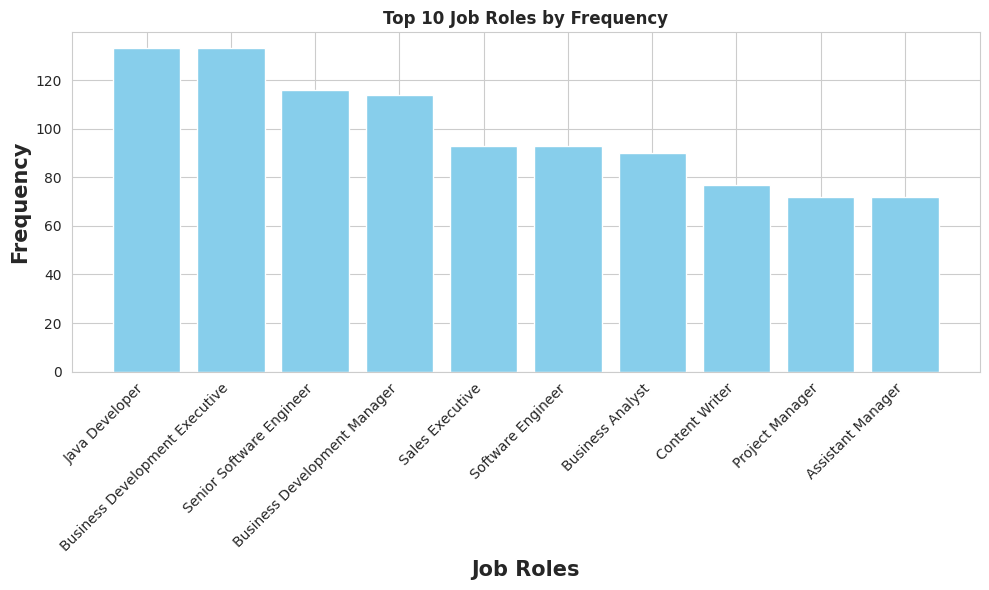

In [ ]:
import matplotlib.pyplot as plt

job_roles = plot.index.tolist()
frequencies = plot.values.tolist()

plt.figure(figsize=(10, 6))
plt.bar(job_roles, frequencies, color='skyblue')

plt.xlabel("Job Roles", fontweight = 'bold',fontsize = 11)
plt.ylabel("Frequency", fontweight = 'bold', fontsize = 11)

plt.title("Top 10 Job Roles by Frequency", fontweight = 'bold')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

###  **Companies are most preference these Top 10 responsibilities**

In [ ]:
responsibilities = []

for i in df['resposibilities']:
  responsibilities += (i.split(','))

responsibilities = list((set(responsibilities)))

In [ ]:
len(responsibilities)

35059

In [ ]:
# data = []

# for responsibility in tqdm(responsibilities):

#   c = 0

#   for i in df['resposibilities']:
#     if responsibility.lower() in i.lower().split(','):

#       c += 1

  # data.append([responsibility, c])

In [ ]:
all_responsilibities = df['resposibilities'].str.split(',').explode()
data = all_responsilibities.value_counts().head(10)

In [ ]:
data

,count
resposibilities,
Sales,2171
Consulting,1981
communication,1664
Analytical,1345
Management,1266
Business process,1253
Agile,1227
SAP,1207
SQL,1132


**Insights:**
* The plot can help identify which responsibilities are most sought after by companies, providing valuable insights for job seekers and professionals in understanding current market trends.

Text(0, 0.5, 'Frequency')

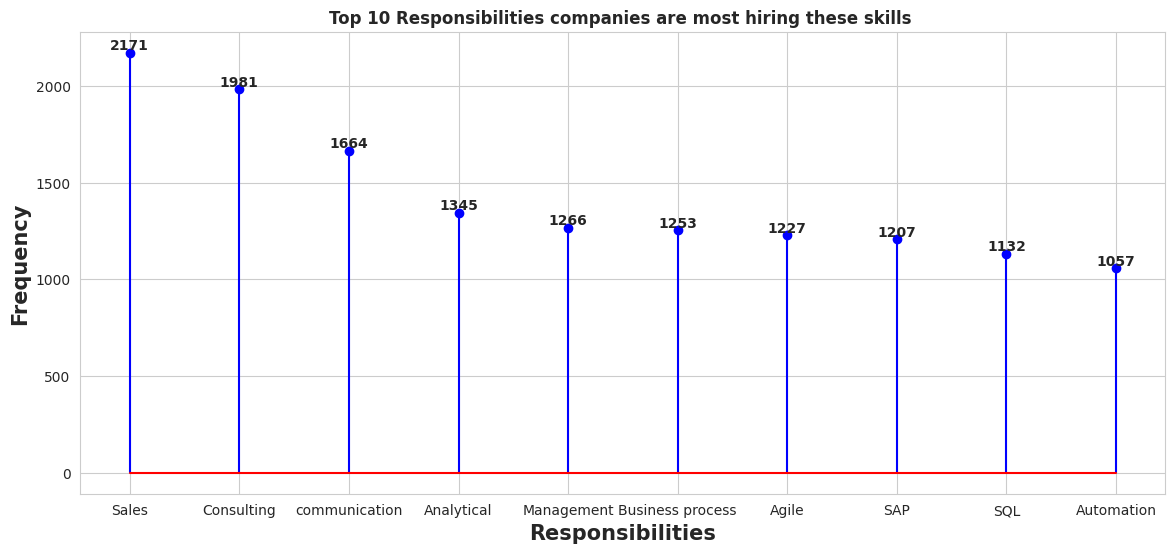

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.stem(data.index, data.values, linefmt='b-', markerfmt='bo', basefmt='r-')

for i, v in enumerate(data.values):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

plt.title("Top 10 Responsibilities companies are most hiring these skills ", fontweight='bold')

plt.xlabel("Responsibilities", fontweight='bold', fontsize = 15)
plt.ylabel("Frequency", fontweight = 'bold', fontsize = 15)

#### **Analyze the dataset which locations are most hiring the candidates**

In [ ]:
result = []
for location in df['location'].unique():
  result += location.split(',')

  result = list(set(result))

In [ ]:
results = []
for location in result:
  c = 0

  for j in df['location']:

    if location in j.split(','):
      c += 1
  results.append([location,c])

In [ ]:
data = pd.DataFrame(results, columns = ['locations','freq']).sort_values(by = 'freq', ascending = False).head(10)

**It's analyzing the geographical distribution of job
opportunities to highlight the areas with the highest demand for candidates.**

**1.**  It identifies the top 10 locations where companies are hiring the most candidates.

**2.**  It visualizes the hiring frequency for each location using a bar chart for comparison.



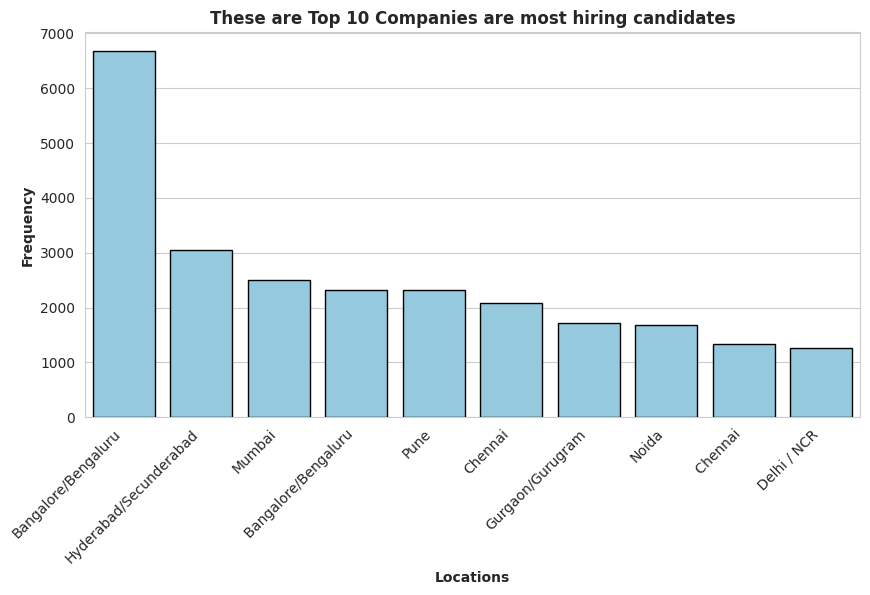

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

x = data['locations']
y = data['freq']

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=x, y=y, color='skyblue')  # Use 'color' to customize bar color

# Customize the plot
plt.title('These are Top 10 Companies are most hiring candidates',fontweight = 'bold')

plt.xlabel('Locations', fontweight = 'bold')

plt.ylabel('Frequency', fontweight = 'bold')

plt.xticks(rotation=45, ha='right')

for patch in ax.patches:
   patch.set_edgecolor('black')


#### **Finding the Top 5 Job roles in all the companies**

In [ ]:
data = []

for jobrole in df['job_role'].unique():
  count = 0

  for i in df['job_role']:

    if jobrole in i:
      count += 1

  data.append([jobrole,count])

In [ ]:
data = pd.DataFrame(data, columns = ['job_role', 'freq']).sort_values(by = 'freq', ascending = False).head()
data

,job_role,freq
457,Manager,6398
685,Engineer,4710
593,Developer,4706
927,Executive,3624
16012,Sales,3128


In [ ]:
data['freq']

,freq
457,6398
685,4710
593,4706
927,3624
16012,3128


**To highlight the most demanded job roles and their frequencies within the dataset.**
* It identifies the top 5 most frequent job roles from the dataset.
* It visualizes the frequency of these job roles using a line plot with markers for emphasis.

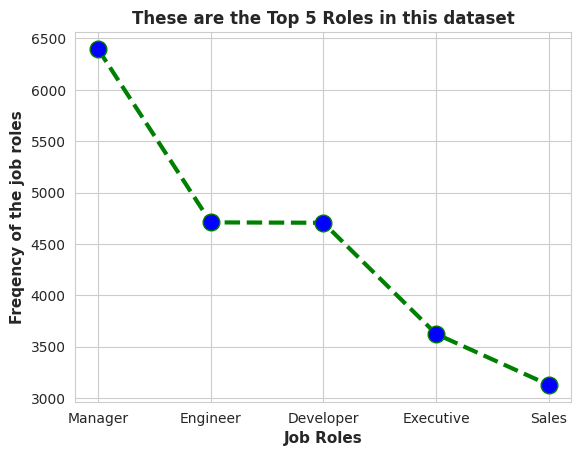

In [ ]:
import matplotlib.pyplot as plt

x = data['job_role']
y = data['freq']

plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)

plt.xlabel('Job Roles', fontsize = 11, fontweight = 'bold')

plt.ylabel('Freqency of the job roles',fontsize = 11, fontweight = 'bold')

plt.title('These are the Top 5 Roles in this dataset', fontweight = 'bold')

plt.show()

### **Most Required skills for Data Analytics**

In [ ]:
df_analyst = df[df['job_role'] == 'Data Analyst']

df_sort = df_analyst['resposibilities'].str.lower().str.split(',').explode().value_counts()

df_sort.sort_values(ascending = False).head(10)

,count
resposibilities,
data analysis,15
sql,14
excel,9
data analyst,8
power bi,7
tableau,7
data management,6
analytics,6
python,6


#### **Avg rating column**

In [ ]:
df['rating'].mean()

3.9390241240039296

#### **Analyze the trends in demand for entry-level vs. senior positions.**

In [ ]:
data = []

for yrs in range(df['exp_end'].max()+1):

  indexes = []
  indx = 0

  for i in df['experience']:

    st,end =  i.replace(' Yrs','').split('-')
    if ( yrs >= int(st) and yrs <= int(end) ):

      indexes.append(indx)
    indx += 1

  data.append([yrs, len(df.iloc[indexes])])


* It identifies the relationship between years of experience and the number of job postings for those experience levels.
* It analyzing the trends in demand for candidates with different levels of experience.

In [ ]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

x = [item[0] for item in data]
y = [item[1] for item in data]


sns.set_style("whitegrid")
sns.set_palette("pastel")


fig = go.Figure(data=[go.Bar(x=x, y=y, marker_color='skyblue', marker_line_color='black', marker_line_width=1)])


fig.update_layout(
    title='Job Postings',

    xaxis_title='Years Of Experience',
    yaxis_title='Number Of Jobs',
    xaxis=dict(tickmode='linear'),
    yaxis=dict(gridcolor='lightgrey'),

    plot_bgcolor='white'
)

fig.add_trace(go.Scatter(x=x, y=y, mode='lines+markers', line=dict(color='black'), marker=dict(color='black')))

fig.show()

In [ ]:
ratings = []

for unique_rating in df['rating'].unique():
  c = 0

  for i in df['rating']:

    if unique_rating == i:
      c += 1

  ratings.append([unique_rating,c])


In [ ]:
x = [i[0] for i in ratings]
y = [i[1] for i in ratings]

**It helps understand how often each rating occurs and if there are any patterns in the ratings data.**
* It analyzes the distribution of ratings.
* It visualizes the relationship between rating and frequency using a scatter plot.

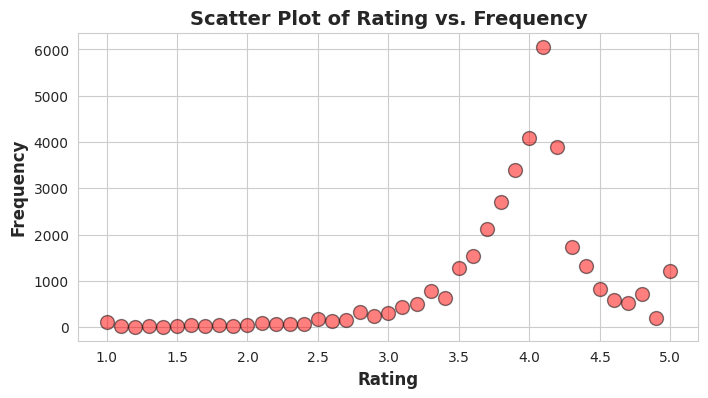

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,4))
plt.scatter(x, y,
            s=100,
            c='red',
            marker='o',
            alpha=0.5,
            edgecolors='black',
            linewidths=1
           )

plt.xlabel("Rating", fontsize=12, fontweight='bold')
plt.ylabel("Frequency", fontsize=12, fontweight='bold')
plt.title("Scatter Plot of Rating vs. Frequency", fontsize=14, fontweight='bold')

plt.grid(True)

plt.show()

#### **Find the most voted reviews for each company**

In [ ]:
data  =df.groupby('company')['reviews'].max().sort_values(ascending = False).head(10)

**It's highlighting the companies that have received the most feedback, which can be an indicator of popularity or customer engagement.**

* It identifies the top 10 companies with the most reviews.
* It visualizes these companies and their review counts using a horizontal bar chart.

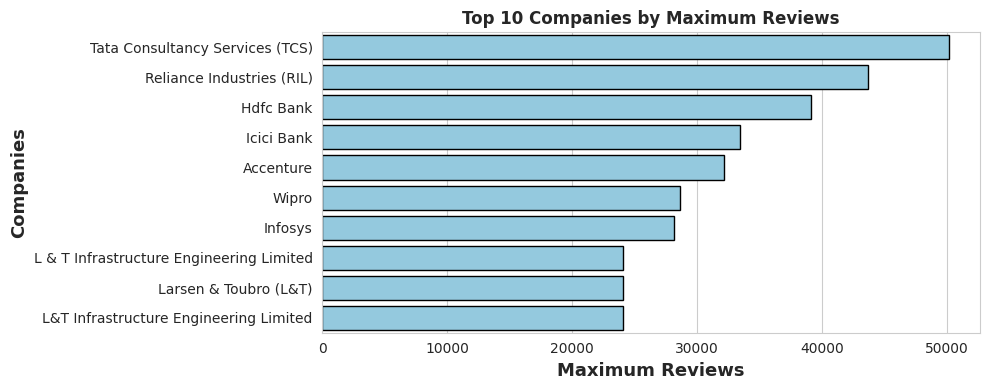

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(10, 4))

ax = sns.barplot(x=data.values, y=data.index, color='skyblue')

plt.title('Top 10 Companies by Maximum Reviews', fontweight='bold')
plt.xlabel('Maximum Reviews', fontweight='bold', fontsize = 13)
plt.ylabel('Companies', fontweight='bold',fontsize = 13)

for patch in ax.patches:
    patch.set_edgecolor('black')

plt.tight_layout()
plt.show()
